In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#carico il csv nel dataframe
df = pd.read_csv('calories.csv')
df.head()

,Unnamed: 0,kg,calories
0,0,162,293.22
1,1,66,120.12
2,2,161,293.02
3,3,108,198.72
4,4,107,194.74


In [3]:
#X è la nostra variabile indipendente (matrice delle caratteristiche), deve essere un array 2D per scikit-learn
X = df['kg'].values[:, np.newaxis]
X.shape


(10000, 1)

In [4]:
#y è la nostra variabile dipendente (ciò che vogliamo prevedere)
y = df['calories']
y

0       293.22
1       120.12
2       293.02
3       198.72
4       194.74
         ...  
9995    266.80
9996    266.00
9997    172.90
9998    218.75
9999    136.16
Name: calories, Length: 10000, dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #separo il df in 80% per il training e 20% per il test (di default è 0.25)
X_train

array([[ 59],
       [120],
       [106],
       ...,
       [158],
       [ 64],
       [144]], shape=(8000, 1))

In [6]:
X_test

array([[128],
       [141],
       [ 67],
       ...,
       [140],
       [ 81],
       [100]], shape=(2000, 1))

In [7]:
y_train

9254    103.25
1561    213.60
1670    185.50
6087    243.39
6669    204.70
         ...  
5734    211.60
5191    178.48
5390    279.66
860     113.92
7270    257.76
Name: calories, Length: 8000, dtype: float64

In [8]:
y_test

6252    235.52
4684    252.39
1731    117.92
4742    263.13
4521     99.90
         ...  
6412    213.58
8285    135.05
7853    252.00
1095    141.75
6929    177.00
Name: calories, Length: 2000, dtype: float64

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
print(f"Intercetta: {model.intercept_:.2f}") #valore di y quando la X è zero
print(f"Coefficiente: {model.coef_[0]:.2f}") #pendenza

Intercetta: -0.20
Coefficiente: 1.80


In [11]:
y_pred = model.predict(X_test)
y_pred

array([230.57342811, 254.01089061, 120.59764253, ..., 252.20800887,
       145.83798676, 180.09273964], shape=(2000,))

In [12]:
for real, pred in zip(y_test[:5], y_pred[:5]): #mi crea una lista di tuple iterabili
    print(f"Test reale: {real:.2f} - Test Predetto: {pred:.2f}")

Test reale: 235.52 - Test Predetto: 230.57
Test reale: 252.39 - Test Predetto: 254.01
Test reale: 117.92 - Test Predetto: 120.60
Test reale: 263.13 - Test Predetto: 264.83
Test reale: 99.90 - Test Predetto: 97.16


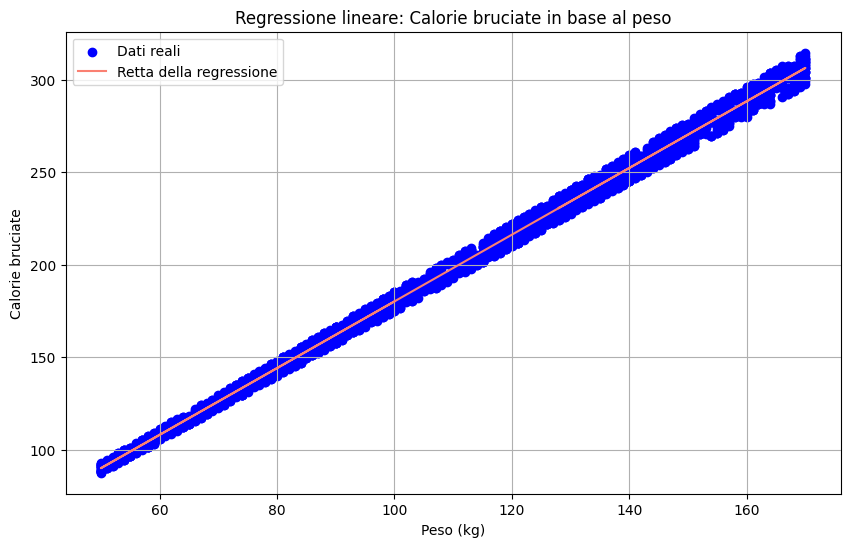

In [13]:
plt.figure(figsize =(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dati reali')
plt.plot(X_test, y_pred, color='salmon', label='Retta della regressione')
plt.xlabel('Peso (kg)')
plt.ylabel('Calorie bruciate')
plt.title('Regressione lineare: Calorie bruciate in base al peso')
plt.legend()
plt.grid(True)
plt.show()

13.419592809404461
0.996602484676042


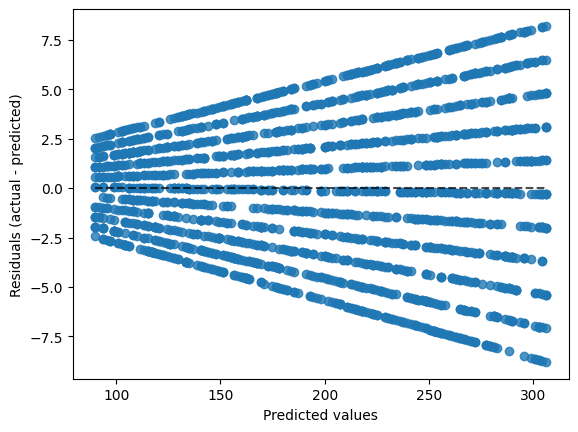

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

display = PredictionErrorDisplay(y_true = y_test, y_pred = y_pred)
display.plot()
plt.show()